<a href="https://colab.research.google.com/github/Hariprasathsaravanan/Chennai-House-Price-Prediction-Assignment/blob/main/chennai_houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
from google.colab import drive

**Data Collection and Data Preprocessing**

In [ ]:
#Load the Training dataset from google drive
df=pd.read_csv('/content/drive/MyDrive/dataset.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Find the total number of rows and columns in dataset**

In [ ]:
df.shape

(7109, 22)

**Dataset contains 7109 rows and 22 columns**

**Find the Statistical Measures of data**

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**observations:**

1.N_BEDROOM,N_BATHROOM features are integer value,we need to convert as this   feature as integer datatype

2.DATE_SALE,DATE_BUILD features are datetime value,we need to convert as this feature as datetime datatype format

3.PRT_ID,REG_FEE,COMMIS features are not required for predicting house price,we need to drop those features

**Checking the duplicate values of given dataset**

In [ ]:
duplicates=df.duplicated().sum()
print(duplicates)

0


**No Duplicate Values Present in given dataset**

**PRT_ID,REG_FEE,COMMIS columns does not create any impact on salesprice prediction,so drop the features**

In [ ]:
df.drop(["PRT_ID","REG_FEE","COMMIS","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace=True)

In [ ]:
df.shape

(7109, 15)

**Print the overall information about the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  SALES_PRICE    7109 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 833.2+ KB


**Convert both DATESALE and DATEBUILD columns datatype into datetime object**

In [ ]:
df[['DATE_SALE','DATE_BUILD']]=df[['DATE_SALE','DATE_BUILD']].apply(pd.to_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  SALES_PRICE    7109 non-null   int64         
dtypes: datetime64[ns](2),

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,7600000
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,21717770
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,13159200
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,9630290
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,7406250


**Area Feature column spelling is different for same Area Name,we need to replace correct Spelling Name on AREA Features Column**

In [ ]:
df.replace({"AREA":{'Adyr':'Adyar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Chrmpet':'Chrompet','Chrompt':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','TNagar':'T Nagar','Velchery':'Velachery'}},inplace=True)

**SALE_COND Feature column spelling is different for same SALE_COND Name,we need to replace correct Spelling Name on SALE_COND Features Column**

In [ ]:
df.replace({"SALE_COND":{'Ab Normal':'AbNormal','AdjLand':'Adj Land','Partiall':'Partial','PartiaLl':'Partial'}},inplace=True)

**PARK_FACIL Feature column spelling is different for same PARK_FACIL Name,we need to replace correct Spelling Name on PARK_FACIL Features Column**

In [ ]:
df.replace({"PARK_FACIL":{'Noo':'No'}},inplace=True)

**BUILD_TYPE Feature column spelling is different for same BUILD_TYPE Name,we need to replace correct Spelling Name on BUILD_TYPE Features Column**

In [ ]:
df.replace({"BUILDTYPE":{'Comercial':'Commercial','Other':'Others'}},inplace=True)

**UTILITY_AVAIL Feature column spelling is different for same UTILITY_AVAIL Name,we need to replace correct Spelling Name on UTILITY_AVAIL Features Column**

In [ ]:
df.replace({"UTILITY_AVAIL":{'AllPub':'All Pub','NoSewr':'NoSeWa','NoSewr ':'NoSeWa'}},inplace=True)

**STREET Feature column spelling is different for same STREET Name,we need to replace correct Spelling Name on STREET Features Column**

In [ ]:
df.replace({"STREET":{'NoAccess':'No Access','Pavd':'Paved'}},inplace=True)

**Checking for Null Values of each and every column**

In [ ]:
df.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
dtype: int64

Replacing Null Values:
**N_BEDROOM,N_BATHROOM are discrete feature,so replacing with mode**

In [ ]:
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0],inplace=True)
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0],inplace=True)

Checking Null Values one more time

In [ ]:
df.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
dtype: int64

**create AGE_OF_BUILD column to subract DATE_SALE and DATE_BUILD**

In [ ]:
df['AGE_OF_BUILD']=(df.DATE_SALE-df.DATE_BUILD)
df['AGE_OF_BUILD']=df['AGE_OF_BUILD']/np.timedelta64(1,'Y')
df['AGE_OF_BUILD']=np.round(df['AGE_OF_BUILD'])

**Drop DATE_SALE and DATE_BUILD column,since these column used for computing age of building**

In [ ]:
df.drop(['DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

**EXploratory Data Analysis:**

**Data Visualization**

Text(0.5, 1.0, 'AREA Vs SALES_PRICE')

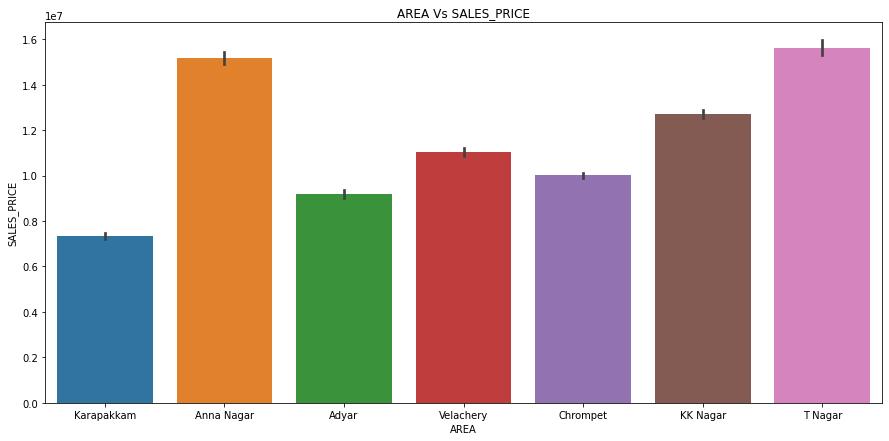

In [ ]:
plt.figure(figsize=(15,7))
ax=sns.barplot(x=df.AREA,y=df.SALES_PRICE)
plt.title("AREA Vs SALES_PRICE")

**observations:**

1.There is a relationship between AREA and SALES_PRICE

2.There is a Linear Relationship between AREA and SALES_PRICE


**Label encoding for AREA Features based on the distribution level**

In [ ]:
df.replace({"AREA":{'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6}},inplace=True)

**Data Visualization Plot:SALES_COND Vs SALESPRICE**

Text(0.5, 1.0, 'SALE_COND Vs SALES_PRICE')

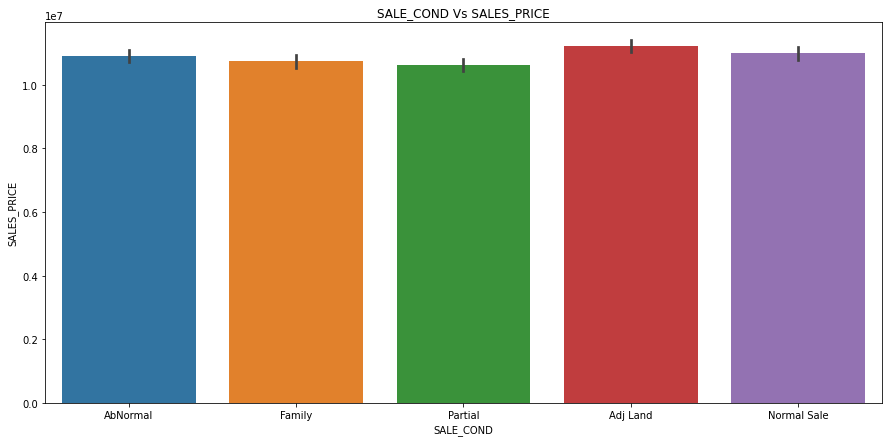

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE)
plt.title("SALE_COND Vs SALES_PRICE")

**observations:**

1.There is a relationship between SALE_COND and SALES_PRICE

2.There is a Linear Relationship between SALE_COND and SALES_PRICE

In [ ]:
df.replace({"SALE_COND":{'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'Adj Land':4}},inplace=True)

**Data Visualization Plot:PARK_FACIL Vs SALESPRICE**

Text(0.5, 1.0, 'PARK_FACIL Vs SALES_PRICE')

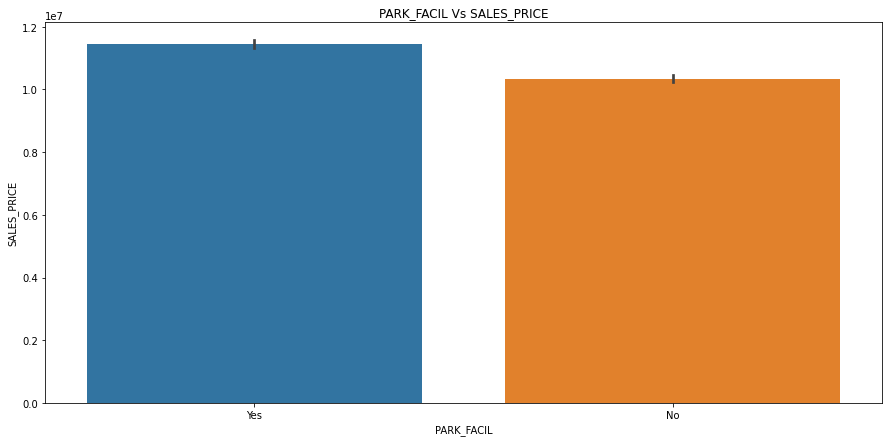

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE)
plt.title("PARK_FACIL Vs SALES_PRICE")

Label encoding for PARK_FACIL features column

In [ ]:
df.replace({"PARK_FACIL":{'No':0,'Yes':1}},inplace=True)

**Data Visualization Plot:BUILDTYPE Vs SALESPRICE**

Text(0.5, 1.0, 'BUILDTYPE Vs SALES_PRICE')

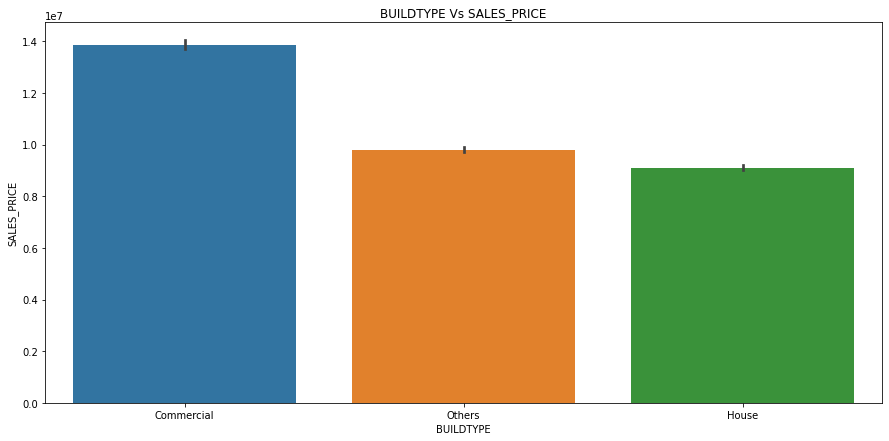

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE)
plt.title("BUILDTYPE Vs SALES_PRICE")

Label encoding for BUILDTYPE feature column

In [ ]:
df.replace({"BUILDTYPE":{'House':0,'Others':1,'Commercial':2}},inplace=True)

**Data Visualization Plot:UTILITY_AVAIL Vs SALESPRICE**

---



Text(0.5, 1.0, 'UTILITY_AVAIL Vs SALES_PRICE')

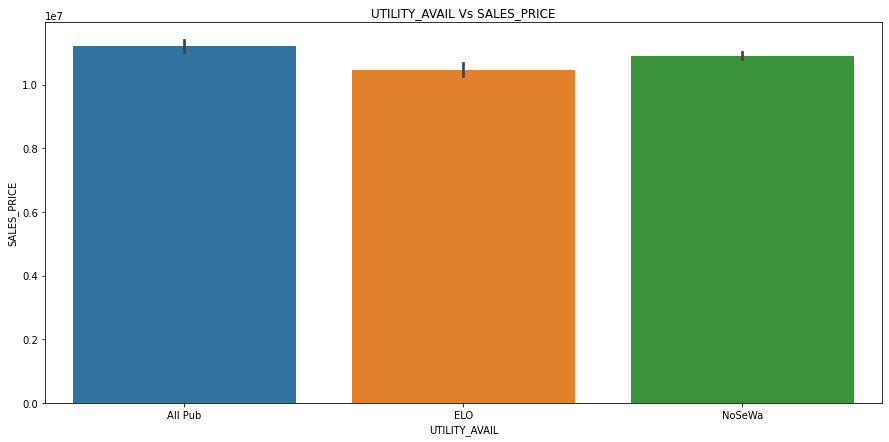

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.UTILITY_AVAIL,y=df.SALES_PRICE)
plt.title("UTILITY_AVAIL Vs SALES_PRICE")

Label encoding for UTILITY_AVAIL feature column

In [ ]:
df.replace({"UTILITY_AVAIL":{'ELO':0,'NoSeWa':1,'All Pub':2}},inplace=True)

**Data Visualization Plot:STREET Vs SALESPRICE**

Text(0.5, 1.0, 'STREET Vs SALES_PRICE')

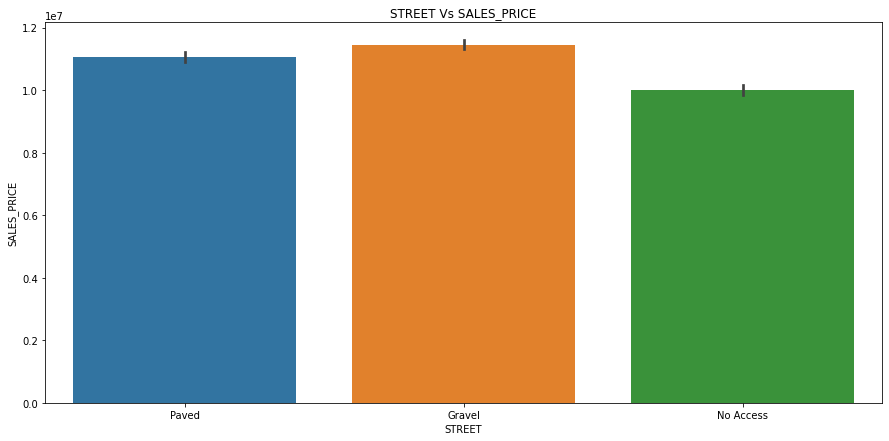

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.STREET,y=df.SALES_PRICE)
plt.title("STREET Vs SALES_PRICE")

label encoding for STREET Feature column

In [ ]:
df.replace({"STREET":{'No Access':0,'Paved':1,'Gravel':2}},inplace=True)

**Data Visualization Plot:MZZONE Vs SALESPRICE**

Text(0.5, 1.0, 'MZZONE Vs SALES_PRICE')

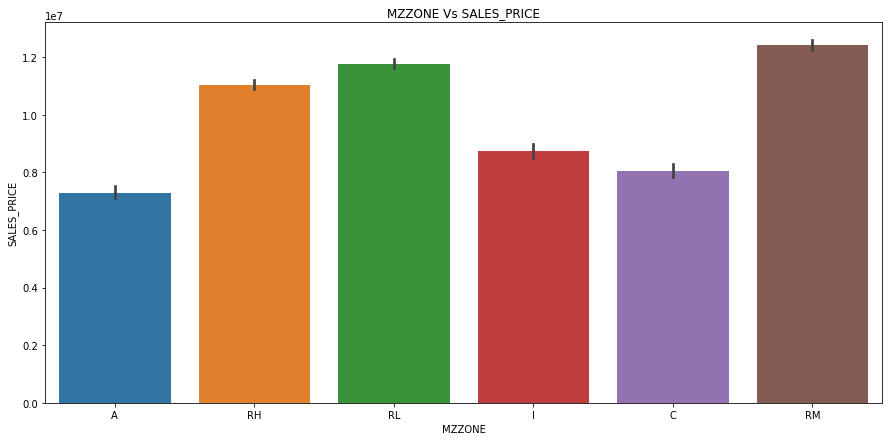

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE)
plt.title("MZZONE Vs SALES_PRICE")

**Label encoding for MZZONE feature column**

In [ ]:
df.replace({"MZZONE":{'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5}},inplace=True)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BUILD
0,0,1004,131,1.0,1.0,3,2,1,2,2,1,0,7600000,44.0
1,5,1986,26,2.0,1.0,5,2,0,2,2,2,3,21717770,11.0
2,1,909,70,1.0,1.0,3,2,1,2,0,2,4,13159200,20.0
3,3,1855,14,3.0,2.0,5,1,0,1,1,1,2,9630290,22.0
4,0,1226,84,1.0,1.0,3,2,1,1,2,2,1,7406250,30.0


**Data Visualization Plot:N_BEDROOM Vs SALESPRICE**

Text(0.5, 1.0, 'N_BEDROOM Vs SALES_PRICE')

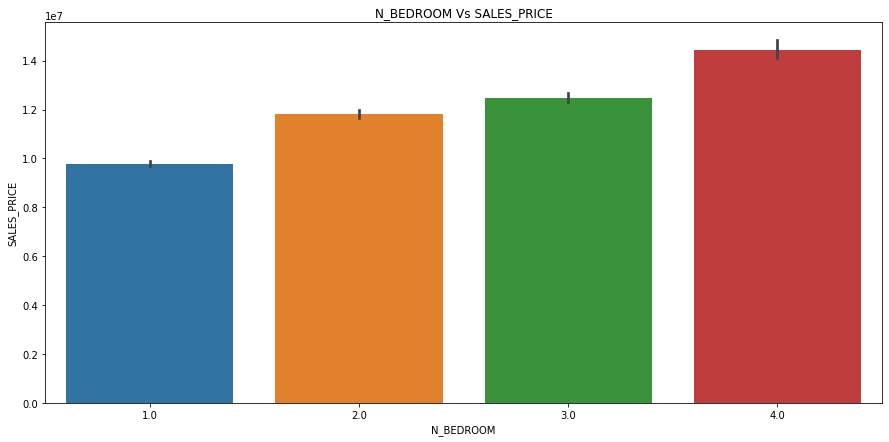

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE)
plt.title("N_BEDROOM Vs SALES_PRICE")

**There is a linear relationship between N_BEDROOM vs SALES_PRICE**

**Data Visualization Plot:N_BATHROOM Vs SALESPRICE**

Text(0.5, 1.0, 'N_BATHROOM Vs SALES_PRICE')

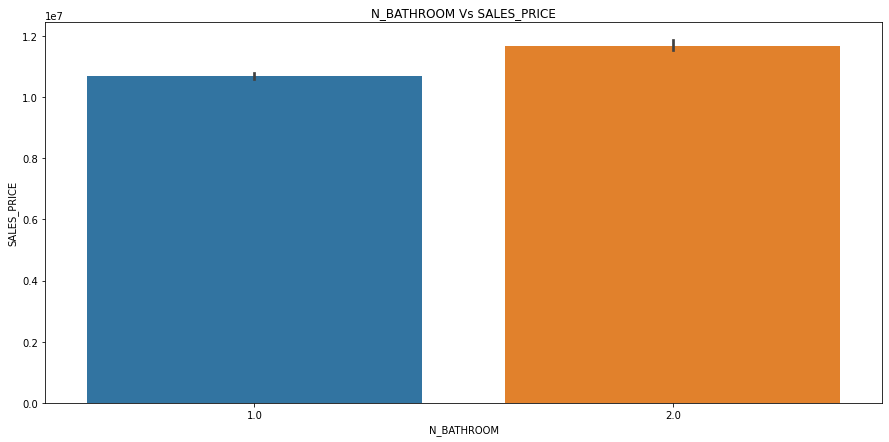

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.N_BATHROOM,y=df.SALES_PRICE)
plt.title("N_BATHROOM Vs SALES_PRICE")

**There is a linear relationship between N_BEDROOM vs SALES_PRICE**

 **Data Visualization Plot:N_ROOM Vs SALESPRICE**

Text(0.5, 1.0, 'N_ROOM Vs SALES_PRICE')

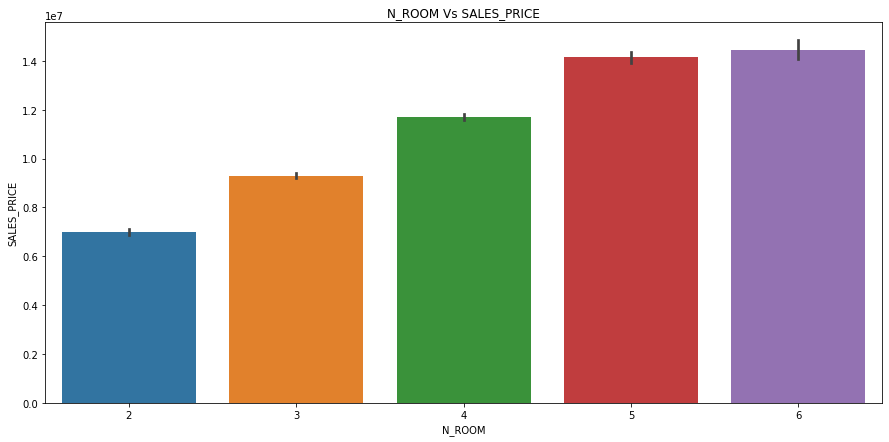

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE)
plt.title("N_ROOM Vs SALES_PRICE")

**There is a linear relationship between N_ROOM vs SALES_PRICE**

**Data Visualization Plot:INT_SQFT Vs SALESPRICE**

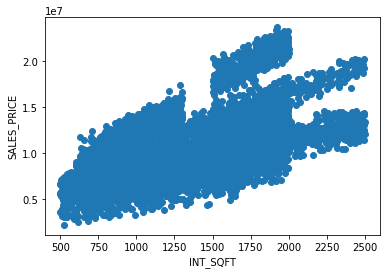

In [ ]:
plt.scatter(x=df.INT_SQFT,y=df.SALES_PRICE)
plt.xlabel("INT_SQFT")
plt.ylabel("SALES_PRICE")
plt.show()

**Correlation Matrix:**

In [ ]:
correlation=df.corr()

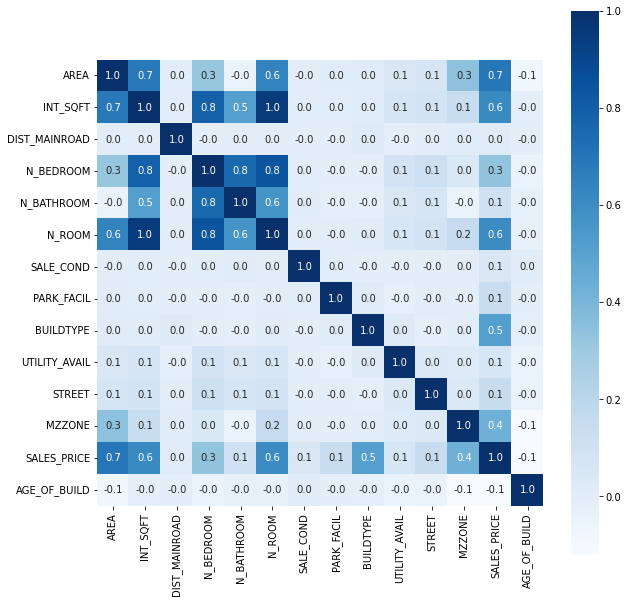

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',cmap='Blues')

**Splitting the data and Target**

In [ ]:
x=df.drop(['SALES_PRICE'],axis=1)
y=df['SALES_PRICE']

In [ ]:
print(x)
print(y)

      AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0        0      1004            131        1.0         1.0       3          2   
1        5      1986             26        2.0         1.0       5          2   
2        1       909             70        1.0         1.0       3          2   
3        3      1855             14        3.0         2.0       5          1   
4        0      1226             84        1.0         1.0       3          2   
...    ...       ...            ...        ...         ...     ...        ...   
7104     0       598             51        1.0         1.0       2          4   
7105     3      1897             52        3.0         2.0       5          1   
7106     3      1614            152        2.0         1.0       4          3   
7107     0       787             40        1.0         1.0       2          0   
7108     3      1896            156        3.0         2.0       5          0   

      PARK_FACIL  BUILDTYPE

**Splitting the data into train and test data**

In [ ]:
x_Train,x_Test,y_Train,y_Test=train_test_split(x,y,test_size=0.2,random_state=2)

**Model Training: Linear Regression**

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
lin_reg_model.fit(x_Train,y_Train)

LinearRegression()

**Model Evaluation:Linear Regression(R-Square Method)**

In [ ]:
training_data_prediction=lin_reg_model.predict(x_Train)

In [ ]:
error_score=metrics.r2_score(y_Train,training_data_prediction)
print("Linear regression model training data R-squared error is",error_score)

Linear regression model training data R-squared error is 0.882968160488941


**Visualizing the Actual Price vs Predicted Price**

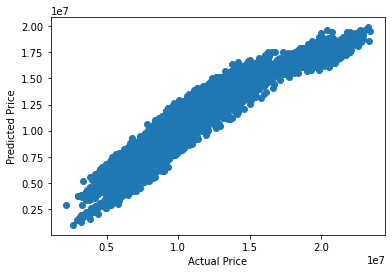

In [ ]:
plt.scatter(y_Train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [ ]:
lin_reg_model.fit(x_Test,y_Test)

LinearRegression()

**Model prediction on Test data Linear Regression**

In [ ]:
testing_data_prediction=lin_reg_model.predict(x_Test)

**Evaluation Metrics on Test data-R-Squared error**

In [ ]:
error_score_testing=metrics.r2_score(y_Test,testing_data_prediction)
print("Linear regression model testing data R-squared error is",error_score_testing)

Linear regression model testing data R-squared error is 0.8771575362939672


**Visualizing the actual price vs predicted price on test data**

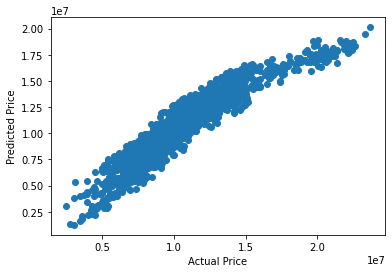

In [ ]:
plt.scatter(y_Test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Model Training:Decision Tree Regressor**

In [ ]:
Dt_Reg=DecisionTreeRegressor()

In [ ]:
Dt_Reg.fit(x_Train,y_Train)

DecisionTreeRegressor()

**Model Prediction on Training data:Decision Tree regressor**

In [ ]:
training_data_prediction_Dt=Dt_Reg.predict(x_Train)

**Evaluation Metrics on Training data**

In [ ]:
error_score_Dt=metrics.r2_score(y_Train,training_data_prediction_Dt)
print("Decision Tree Regressor Training data R-Squared error is",error_score_Dt)

Decision Tree Regressor Training data R-Squared error is 1.0


**Visualizing the actual price vs predicted price on training data**

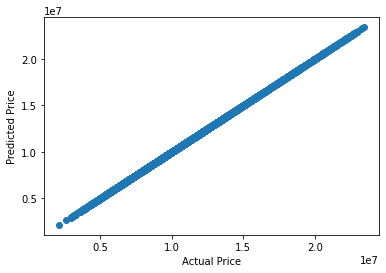

In [ ]:
plt.scatter(y_Train,training_data_prediction_Dt)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Observations**:

1.while Training the training data set using Decision tree model,it will give the perfect linear curve and R-square error value also 1 

2.This model overfitting the Training data set

In [ ]:
Dt_Reg.fit(x_Test,y_Test)

DecisionTreeRegressor()

**Model Prediction on Testing data:Decision Tree regressor**

In [ ]:
testing_data_prediction_Dt=Dt_Reg.predict(x_Test)

**Evaluation Metrics on Testing data**

In [ ]:
error_score_Dt_test=metrics.r2_score(y_Test,testing_data_prediction_Dt)
print("Decision Tree Regressor testing data R-Squared error is",error_score_Dt_test)

Decision Tree Regressor testing data R-Squared error is 1.0


**Visualizing the actual price vs predicted price on testing data**

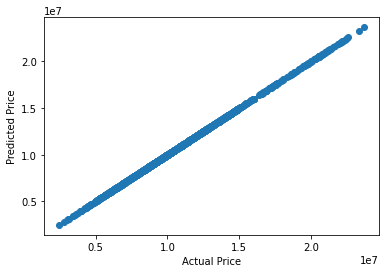

In [ ]:
plt.scatter(y_Test,testing_data_prediction_Dt)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Observations:**

1.while Training the testing data set using Decision tree model,it will give the perfect linear curve and R-square error value also 1 

2.This model overfitting both Training and Testing data set

3.To Avoid Overfitting of the Decision Tree Model,we will move on to random Forest Regressor

**Model Training:Random Forest Regressor**

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_Train,y_Train)

RandomForestRegressor()

**Predict the training data using RandomForestRegressor**

In [ ]:
training_data_prediction_rf=rf.predict(x_Train)

***Evaluate the Training data model***

In [ ]:
tf_score_training=metrics.r2_score(y_Train,training_data_prediction_rf)
print("Random Forest training data R-Squared error is",tf_score_training)

Random Forest training data R-Squared error is 0.9983709271451761


**Visualizing Actual Price vs predicted Price on Training data**

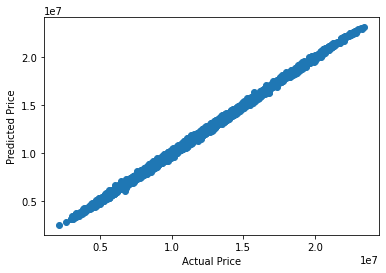

In [ ]:
plt.scatter(y_Train,training_data_prediction_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [ ]:
rf.fit(x_Test,y_Test)

RandomForestRegressor()

**Predict the testing data using RandomForestRegressor**

In [ ]:
testing_data_prediction_rf=rf.predict(x_Test)

**Evaluate the Testing data model**

In [ ]:
testing_data_prediction_rf=rf.predict(x_Test)

**Evaluate the Testing data model**

In [ ]:
tf_score_testing=metrics.r2_score(y_Test,testing_data_prediction_rf)
print("Random Forest test data R-Squared error is",tf_score_testing)

Random Forest test data R-Squared error is 0.9962680222341357


**Visualizing Actual Price vs predicted Price on Testing data**

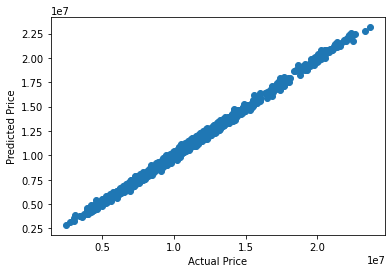

In [ ]:
plt.scatter(y_Test,testing_data_prediction_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Model Training:XGBoost Regressor**

In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(x_Train,y_Train)

[05:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Predict the training data using XGB Regressor Model**

In [ ]:
training_data_prediction_XGB=model.predict(x_Train)

**Evaluate the training data model:R-Squared Metrics**

In [ ]:
score_1=metrics.r2_score(y_Train,training_data_prediction_XGB)
print("XGB Regressor Training data R-Squared Error is",score_1)

XGB Regressor Training data R-Squared Error is 0.9921245625166394


**Visualizing the actual price vs predicted price on training data**

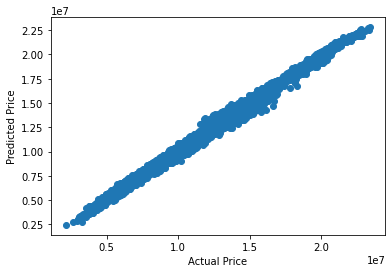

In [ ]:
plt.scatter(y_Train,training_data_prediction_XGB)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Fit the model on Test Data**

In [ ]:
model.fit(x_Test,y_Test)

[05:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Predict the testing data using XGB Regressor Model** 

In [ ]:
testing_data_prediction_XGB=model.predict(x_Test)

**Evaluate the testing data model:R-Squared Metrics**

In [ ]:
score_2=metrics.r2_score(y_Test,testing_data_prediction_XGB)
print("XGB Regressor Testing data R-Squared Error is",score_2)

XGB Regressor Testing data R-Squared Error is 0.9925226818809283


**Visualizing the actual price vs predicted price on test data**

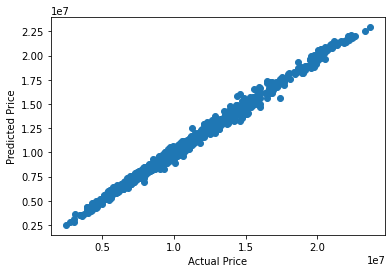

In [ ]:
plt.scatter(y_Test,testing_data_prediction_XGB)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()